# Ant Colony Optimization
## Problema del Vendedor Viajero / Travelling Salesman Problem (TSP)

In [1]:
import numpy as np
from random import sample, shuffle
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib.animation import FuncAnimation
import math

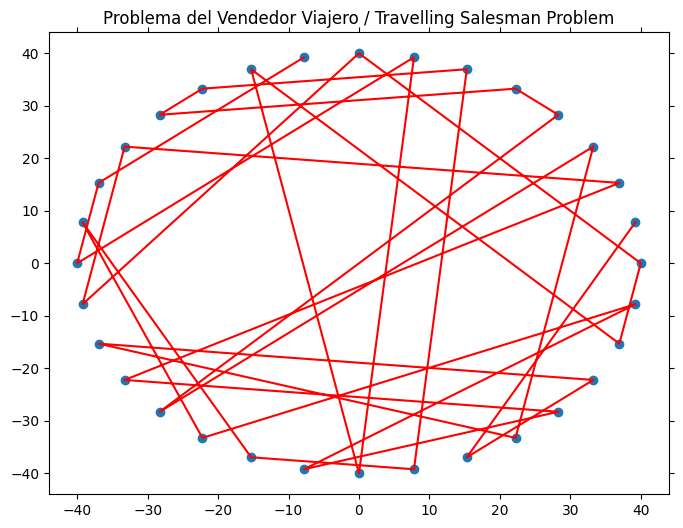

In [2]:
# creamos los datos de entrada para el problema: ciudades, distancias y población
n_genes = 32
n_chromosomes = 300
radius = 40

cities = ([(math.cos(2*math.pi/n_genes*x)*radius,math.sin(2*math.pi/n_genes*x)*radius) for x in range(0,n_genes)])
distances = pairwise_distances(cities, metric='euclidean')

def getPopulation(n_genes, n_chromosomes):
    """
    Generamos una población de n_cromosomas con diferentes permutaciones de n_genes
    """
    population = []
    n = 0
    while n < n_chromosomes:
        chromosome = np.random.permutation(n_genes)
        if not any([np.array_equal(chromosome, x) for x in population]):
            population.append(chromosome)
            n += 1
    return population

plotdata = list(cities)
shuffle(plotdata)
plt.figure(figsize=(8,6))
plt.scatter([x[0] for x in plotdata], [x[1] for x in plotdata])
plt.plot([x[0] for x in plotdata], [x[1] for x in plotdata], "r-")
plt.tick_params(bottom='off',
                top='off',
                left='off',
                right='off',
                labelbottom='off',
                labelleft='off')
plt.title("Problema del Vendedor Viajero / Travelling Salesman Problem")
plt.show()

In [3]:
cities

[(40.0, 0.0),
 (39.23141121612922, 7.8036128806451295),
 (36.95518130045147, 15.307337294603592),
 (33.25878449210181, 22.222809320784087),
 (28.284271247461902, 28.2842712474619),
 (22.22280932078409, 33.25878449210181),
 (15.307337294603593, 36.95518130045147),
 (7.803612880645133, 39.23141121612922),
 (2.4492935982947065e-15, 40.0),
 (-7.803612880645128, 39.23141121612922),
 (-15.307337294603588, 36.95518130045147),
 (-22.22280932078408, 33.25878449210182),
 (-28.2842712474619, 28.284271247461902),
 (-33.25878449210181, 22.222809320784087),
 (-36.95518130045147, 15.307337294603595),
 (-39.23141121612922, 7.803612880645145),
 (-40.0, 4.898587196589413e-15),
 (-39.23141121612922, -7.803612880645135),
 (-36.95518130045147, -15.307337294603586),
 (-33.25878449210182, -22.22280932078408),
 (-28.28427124746191, -28.2842712474619),
 (-22.222809320784087, -33.25878449210181),
 (-15.307337294603613, -36.95518130045146),
 (-7.803612880645146, -39.23141121612921),
 (-7.347880794884118e-15, -40

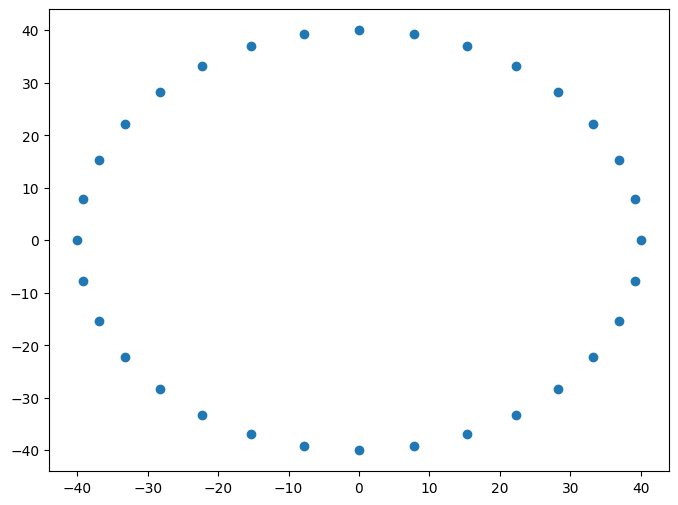

In [4]:
plt.figure(figsize=(8,6))
plt.scatter([x[0] for x in plotdata], [x[1] for x in plotdata])

In [5]:
distances

array([[ 0.        ,  7.84137123, 15.60722576, ..., 23.22277418,
        15.60722576,  7.84137123],
       [ 7.84137123,  0.        ,  7.84137123, ..., 30.61467459,
        23.22277418, 15.60722576],
       [15.60722576,  7.84137123,  0.        , ..., 37.71173895,
        30.61467459, 23.22277418],
       ...,
       [23.22277418, 30.61467459, 37.71173895, ...,  0.        ,
         7.84137123, 15.60722576],
       [15.60722576, 23.22277418, 30.61467459, ...,  7.84137123,
         0.        ,  7.84137123],
       [ 7.84137123, 15.60722576, 23.22277418, ..., 15.60722576,
         7.84137123,  0.        ]])

In [6]:
distances = np.array(distances)
distances.shape

(32, 32)

In [7]:
import numpy as np
from numpy import inf
import sys

#Valores iniciales para nuestro problema
iteration = 100
n_ants = 32
n_citys = 32

In [8]:
# Definición de variables a partir de condiciones iniciales
m = n_ants
n = n_citys
e = 0.5        #Tasa de evaporación
alpha = 1     #Factor de feromona
beta = 2      #Factor de visibilidad

In [9]:
#Calculando la visibilidad de la próxima ciudad visibility(i,j)=1/d(i,j)
np.seterr(divide='ignore', invalid='ignore') #Para evitar problemas por dividir por cero
visibility = 1/distances
visibility[visibility == inf ] = sys.float_info.epsilon

In [10]:
#Inicializando feromona presente a los caminos de las ciudades
pheromne = .1*np.ones((m,n))

#Inicializando la ruta de las hormigas con el tamaño de la ruta(n_ants,n_citys+1)
#Se adiciona 1 solamente para llegar al inicio, se puede quitar!!!
rute = np.ones((m,n+1))

In [11]:
for ite in range(iteration):
    rute[:,0] = 1          #posición inicial y final de todas las hormigas '1', es decir, ciudad '1'
    for i in range(m):
        temp_visibility = np.array(visibility)         #creando una copia de visibilidad
        for j in range(n-1):
            #print(rute)
            combine_feature = np.zeros(5)     #inicializando el arreglo de combine_feature a cero
            cum_prob = np.zeros(5)            #inicializando la matriz de probabilidad acumulativa a ceros
            cur_loc = int(rute[i,j]-1)        #ciudad actual de la hormiga
            temp_visibility[:,cur_loc] = 0     #haciendo visibilidad de la ciudad actual como cero
            p_feature = np.power(pheromne[cur_loc,:],beta)         #calculando la característica de feromona
            v_feature = np.power(temp_visibility[cur_loc,:],alpha)  #calculando la característica de visibilidad
            p_feature = p_feature[:,np.newaxis]                     #añadiendo eje para ajustar tamaño
            v_feature = v_feature[:,np.newaxis]                     #añadiendo eje para ajustar tamaño
            combine_feature = np.multiply(p_feature,v_feature)     #calculando la característica de combinación
            total = np.sum(combine_feature)                        #sumando todas las características
            probs = combine_feature/total   #encontrando la probabilidad de los elementos probs(i) = comine_feature(i)/total
            cum_prob = np.cumsum(probs)     #calculando la suma acumulativa
            #print(cum_prob)
            r = np.random.random_sample()
            #print(r)
            city = np.nonzero(cum_prob>r)[0][0]+1       #encontrando la próxima ciudad que tienen la probabilidad más alta
            #print(city)
            rute[i,j+1] = city              #añadiendo la ciudad a la ruta
        left = list(set([i for i in range(1,n+1)])-set(rute[i,:-2]))[0]     #encontrando la última ciudad no recorrida en la ruta
        rute[i,-2] = left                   #añadiendo la ciudad no recorrida para enrutar
    rute_opt = np.array(rute)               #inicializando ruta óptima
    dist_cost = np.zeros((m,1))             #inicializando total_distance_of_tour con cero

    for i in range(m):
        s = 0
        for j in range(n-1):
            s = s + distances[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1]   #calculando la distancia total del recorrido
        dist_cost[i]=s                      #almacenando la distancia del recorrido para 'i'th ant en la ubicación' i '
    dist_min_loc = np.argmin(dist_cost)             #encontrando la localización del mínimo costo de dist_cost
    dist_min_cost = dist_cost[dist_min_loc]         #encontrando el mínimo de dist_cost
    best_route = rute[dist_min_loc,:]               #inicializando la ruta recorrida como la mejor ruta
    pheromne = (1-e)*pheromne                       #evaporación de la feromona con (1-e)

    for i in range(m):
        for j in range(n-1):
            dt = 1/dist_cost[i]
            pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] = pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] + dt
            #actualizando la feromona con delta_distance
            #delta_distance puede ser configurado agregando más peso a la ruta con feromona

print('route of all the ants at the end :')
print(rute_opt)
print()
print('best path :',best_route)
print('cost of the best path',int(dist_min_cost[0]) + distances[int(best_route[-2])-1,0])

<ipython-input-11-a1e5486eca48>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] = pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] + dt


route of all the ants at the end :
[[ 1. 32. 31. ...  3.  4.  1.]
 [ 1. 32. 31. ...  3.  4.  1.]
 [ 1. 32. 31. ...  3.  4.  1.]
 ...
 [ 1. 32. 31. ...  3.  4.  1.]
 [ 1. 32. 31. ...  3.  4.  1.]
 [ 1. 32. 31. ...  3.  4.  1.]]

best path : [ 1. 32. 31. 30. 29. 28. 27. 26. 25. 24. 23. 22. 21. 20. 19. 18. 17. 16.
 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  2.  3.  4.  1.]
cost of the best path 281.22277418035696


In [12]:
best_route

array([ 1., 32., 31., 30., 29., 28., 27., 26., 25., 24., 23., 22., 21.,
       20., 19., 18., 17., 16., 15., 14., 13., 12., 11., 10.,  9.,  8.,
        7.,  6.,  5.,  2.,  3.,  4.,  1.])

In [13]:
X=[]
Y=[]
for i in range(32):
  X.append(cities[i][0])
  Y.append(cities[i][1])

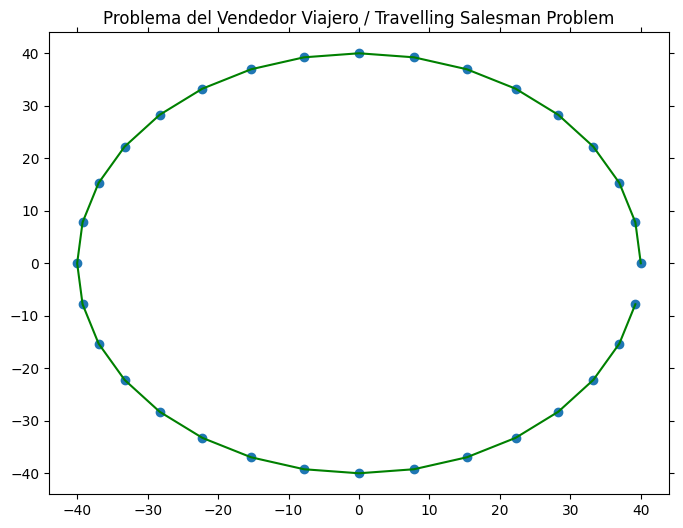

In [14]:
plt.figure(figsize=(8,6))
plt.scatter([x[0] for x in plotdata], [x[1] for x in plotdata])
plt.plot([x for x in X], [x for x in Y], "g-")
plt.tick_params(bottom='off',
                top='off',
                left='off',
                right='off',
                labelbottom='off',
                labelleft='off')
plt.title("Problema del Vendedor Viajero / Travelling Salesman Problem")
plt.show()

In [15]:
import geopandas as gp

In [16]:
!pip install geopandas

## Representando información en un mapa

# **Johns Hopkins CSSE**

# [COVID Map (JHU)](https://coronavirus.jhu.edu/map.html)

## [Base de datos](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data)

### https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

### Coordenadas Colombia
[Geodatos](https://www.geodatos.net/coordenadas/colombia)

[Dane](https://geoportal.dane.gov.co/geovisores/territorio/consulta-divipola-division-politico-administrativa-de-colombia/)

# Visualizando Datos de Viruela del mono

In [17]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Casos_positivos_de_Viruela_s_mica_en_Colombia_20240425 (1).csv to Casos_positivos_de_Viruela_s_mica_en_Colombia_20240425 (1).csv
User uploaded file "Casos_positivos_de_Viruela_s_mica_en_Colombia_20240425 (1).csv" with length 559742 bytes


# **Monkey Pox**

![](https://s.abcnews.com/images/Health/Monkeypox_Symptoms_v05_dap_1653411768372_hpEmbed_1x1_992.jpg)

In [19]:
import pandas as pd
viruela = pd.read_csv('/content/Casos_positivos_de_Viruela_s_mica_en_Colombia_20240425.csv')
viruela

,Semana epidemiológica,Año epidemiológico,Código DIVIPOLA departamento,Código DIVIPOLA municipio,Departamento,Municipio,Fecha notificación,Fecha diagnóstico,Sexo,Edad,...,Condición final,Vínculo epidemiológico,¿Viajó?,País de viaje,Fuente de infección,Fecha de terminación del seguimiento,Pertenencia étnica,Nombre grupo étnico,Tipo de seguridad social,Estrato
0,19,2023,5.0,5001.0,ANTIOQUIA,MEDELLIN,2023-05-11,2023-06-13,M,37,...,1,2,2.0,NaN,FUENTE DESCONOCIDA,2023-05-31,6,NaN,C,3.0
1,37,2022,5.0,5088.0,ANTIOQUIA,BELLO,2022-09-19,2022-09-20,M,18,...,1,2,2.0,NaN,FUENTE DESCONOCIDA,2022-10-06,6,NaN,C,2.0
2,37,2022,11.0,11001.0,BOGOTA,BOGOTA,2022-09-21,2022-09-21,M,30,...,1,2,2.0,NaN,FUENTE DESCONOCIDA,2022-10-04,6,NaN,C,2.0
3,37,2022,5.0,5001.0,ANTIOQUIA,MEDELLIN,2022-09-19,2022-09-21,M,37,...,1,2,2.0,NaN,RELACIONADO CON FUENTE DESCONOCIDA,2022-10-08,6,NaN,S,3.0
4,33,2022,5.0,5001.0,ANTIOQUIA,MEDELLIN,2022-09-02,2022-09-05,M,26,...,1,2,2.0,NaN,FUENTE DESCONOCIDA,2022-09-10,6,NaN,S,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,49,2023,76001.0,76001.0,CALI,CALI,2023-12-15,2023-12-18,M,30,...,1,2,2.0,NaN,EN ESTUDIO,2023-12-28,6,NaN,C,3.0
4208,50,2023,76001.0,76001.0,CALI,CALI,2023-12-18,2023-12-16,M,36,...,1,2,2.0,NaN,EN ESTUDIO,2023-12-31,6,NaN,C,4.0
4209,50,2023,76001.0,76001.0,CALI,CALI,2023-12-29,2023-12-27,M,41,...,1,2,2.0,NaN,EN ESTUDIO,2024-01-06,6,NaN,C,2.0
4210,52,2023,76001.0,76001.0,CALI,CALI,2024-01-04,2024-01-04,M,29,...,1,2,2.0,NaN,EN ESTUDIO,2024-01-20,6,NaN,C,2.0


In [20]:
viruela_df = pd.DataFrame(viruela['Departamento'].value_counts())
viruela_df

,count
Departamento,
BOGOTA,2016
ANTIOQUIA,1205
CALI,367
CUNDINAMARCA,97
SANTANDER,80
BARRANQUILLA,72
RISARALDA,64
TOLIMA,60
VALLE,53


In [21]:
viruela_df.to_excel('DatosFiltrados.xlsx')

In [90]:
import pandas as pd
df_casos = pd.read_excel('/content/BaseDatos_Viruela_Excel.xlsx')
df_casos

,Departamento,CASOS,Lat,Long
0,ANTIOQUIA,1205,6.702032,-75.504557
1,ATLANTICO,15,10.677010,-74.965219
2,BARRANQUILLA,72,NaN,NaN
3,BOGOTA,2016,4.316108,-74.181073
4,BOLIVAR,5,8.079797,-74.235148
5,BOYACA,9,5.891673,-72.627881
6,CALDAS,23,5.280140,-75.274983
7,CALI,367,NaN,NaN
8,CAQUETA,1,0.798556,-73.959468
9,CARTAGENA,19,NaN,NaN


In [113]:
df_casos.dropna().reset_index(drop=True)
df_casos

,Departamento,CASOS,Lat,Long
0,ANTIOQUIA,1205,6.702032,-75.504557
1,ATLANTICO,15,10.677010,-74.965219
3,BOGOTA,2016,4.316108,-74.181073
4,BOLIVAR,5,8.079797,-74.235148
5,BOYACA,9,5.891673,-72.627881
6,CALDAS,23,5.280140,-75.274983
8,CAQUETA,1,0.798556,-73.959468
10,CASANARE,3,5.404064,-71.601881
11,CAUCA,9,2.396834,-76.824233
12,CESAR,11,9.536660,-73.517832


In [114]:
df_casos.shape

(26, 4)

In [115]:
lat = df_casos['Lat'].values
lon = df_casos['Long'].values

In [124]:
lat[2], lon[2]

(4.316107698, -74.181072702)

In [116]:
!pip install haversine

In [117]:
# Calcular arreglo de distancias de 26x26
#Method 1 : Para calcular distancias
import haversine as hs
from haversine import Unit
def distancias(lat,lon):
  resultado = []
  for i in range(lat.shape[0]):
    for j in range(lon.shape[0]):
      result=hs.haversine((lat[i],lon[i]),(lat[j],lon[j]),unit=Unit.KILOMETERS)
      resultado.append(result)
  return resultado

In [118]:
resultado = distancias(lat,lon)

In [119]:
len(resultado), 26*26

(676, 676)

In [120]:
import numpy as np
resultado = distancias(lat,lon)
resultado = np.array(resultado)
distances = resultado.reshape((26,26))

In [167]:
distances

array([[   0.        ,  445.95422654,  303.05185762,  207.51779262,
         330.46158893,  160.1326748 ,  678.43566645,  455.02450689,
         500.55683831,  383.62486013,  186.90216356,  245.36300921,
         629.14407015,  649.80616975,  459.53080232,  467.90544637,
         627.93135951,  328.06759189,  704.39149125,  250.67009363,
         171.56214731,  940.93313235,  222.92254192,  266.31640575,
         297.86145329,  369.85236266],
       [ 445.95422654,    0.        ,  712.55867714,  299.69638571,
         590.96662654,  601.07325349, 1104.0428953 ,  693.40027759,
         943.30052489,  202.93451167,  273.27867079,  659.33506785,
         290.64496409, 1022.38619157,  904.02932585,  844.78574824,
        1062.1451639 ,  366.9459403 , 1147.99244544,  696.41802181,
         615.17325876,  764.13139452,  471.82015243,  179.95253962,
         739.27824141,  811.28151406],
       [ 303.05185762,  712.55867714,    0.        ,  418.54639294,
         245.526282  ,  161.81069193, 

In [168]:
distances[2]

array([ 303.05185762,  712.55867714,    0.        ,  418.54639294,
        245.526282  ,  161.81069193,  391.90806842,  310.31039719,
        362.79765425,  585.09477506,  483.45861912,   57.68906257,
        819.24767717,  350.20621425,  248.89618902,  173.51077723,
        510.8475714 ,  444.0654605 ,  463.38133945,  167.96676074,
        226.50187355, 1234.01017618,  275.33358006,  537.91041784,
        123.22704494,  283.89382375])

In [174]:
distances[2].max()

1234.0101761795593

In [175]:
 df_casos.iloc[24]

Departamento       TOLIMA
CASOS                  60
Lat              4.034773
Long           -75.255827
Name: 28, dtype: object

In [176]:
 df_casos.iloc[21]

Departamento    SAN ANDRES
CASOS                    7
Lat              12.543115
Long            -81.717624
Name: 24, dtype: object

In [177]:
df_casos.iloc[21], df_casos.iloc[11], df_casos.iloc[20]

(Departamento    SAN ANDRES
 CASOS                    7
 Lat              12.543115
 Long            -81.717624
 Name: 24, dtype: object,
 Departamento    CUNDINAMARCA
 CASOS                     97
 Lat                 4.771121
 Long              -74.431111
 Name: 14, dtype: object,
 Departamento    RISARALDA
 CASOS                  64
 Lat              5.240757
 Long           -76.002445
 Name: 23, dtype: object)

In [129]:
distances[2], distances[2].min(), distances[2].max()

(array([ 303.05185762,  712.55867714,    0.        ,  418.54639294,
         245.526282  ,  161.81069193,  391.90806842,  310.31039719,
         362.79765425,  585.09477506,  483.45861912,   57.68906257,
         819.24767717,  350.20621425,  248.89618902,  173.51077723,
         510.8475714 ,  444.0654605 ,  463.38133945,  167.96676074,
         226.50187355, 1234.01017618,  275.33358006,  537.91041784,
         123.22704494,  283.89382375]),
 0.0,
 1234.0101761795593)

In [47]:
import folium
m = folium.Map(location=[4.316108, -74.181073],zoom_start=5)
m

In [48]:
import folium
m = folium.Map(location=[4.316108, -74.181073],zoom_start=5)
for i in range(df_casos.shape[0]):
  tooltip = df_casos['CASOS'].iloc[i]
  folium.Marker([df_casos['Lat'].iloc[i], df_casos['Long'].iloc[i]], popup=df_casos['Departamento'].iloc[i], tooltip=tooltip).add_to(m)
m

In [178]:
import pandas as pd
df_covid_boyaca = pd.read_csv('/content/Casos_positivos_de_COVID-19_en_Colombia. (1).csv')
df_covid_boyaca

<ipython-input-178-987e1becb5c1>:2: DtypeWarning: Columns (14,17,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid_boyaca = pd.read_csv('/content/Casos_positivos_de_COVID-19_en_Colombia. (1).csv')


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-10-23 00:00:00,993950,2020-10-18 00:00:00,15,BOYACA,15238,DUITAMA,6,1,F,...,NaN,NaN,Recuperado,2020-10-17 00:00:00,NaN,2020-10-21 00:00:00,2020-11-01 00:00:00,Tiempo,6.0,NaN
1,2020-08-25 00:00:00,560227,2020-08-12 00:00:00,15,BOYACA,15176,CHIQUINQUIRA,21,1,M,...,NaN,NaN,Recuperado,2020-08-09 00:00:00,NaN,2020-08-23 00:00:00,2020-09-03 00:00:00,Tiempo,6.0,NaN
2,2020-12-19 00:00:00,1484124,2020-12-15 00:00:00,15,BOYACA,15001,TUNJA,51,1,F,...,NaN,NaN,Recuperado,2020-12-13 00:00:00,NaN,2020-12-15 00:00:00,2020-12-28 00:00:00,Tiempo,6.0,NaN
3,2020-07-31 00:00:00,288940,2020-07-21 00:00:00,15,BOYACA,15759,SOGAMOSO,40,1,M,...,NaN,NaN,Recuperado,2020-07-21 00:00:00,NaN,2020-07-30 00:00:00,2020-08-17 00:00:00,Tiempo,6.0,NaN
4,2020-07-31 00:00:00,288947,2020-07-22 00:00:00,15,BOYACA,15469,MONIQUIRA,23,1,F,...,NaN,NaN,Recuperado,2020-07-21 00:00:00,NaN,2020-07-30 00:00:00,2020-08-17 00:00:00,Tiempo,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131128,2021-09-10 00:00:00,4926240,2021-09-07 00:00:00,15,BOYACA,15572,PUERTO BOYACA,12,1,F,...,NaN,NaN,Recuperado,2021-09-07 00:00:00,NaN,2021-09-09 00:00:00,2021-09-22 00:00:00,Tiempo,6.0,NaN
131129,2021-09-10 00:00:00,4926241,2021-09-07 00:00:00,15,BOYACA,15572,PUERTO BOYACA,11,1,M,...,NaN,NaN,Recuperado,2021-09-07 00:00:00,NaN,2021-09-09 00:00:00,2021-09-22 00:00:00,Tiempo,6.0,NaN
131130,2021-09-10 00:00:00,4926296,2021-08-29 00:00:00,15,BOYACA,15176,CHIQUINQUIRA,26,1,M,...,NaN,NaN,Recuperado,2021-08-26 00:00:00,NaN,2021-09-09 00:00:00,2021-09-11 00:00:00,PCR,6.0,NaN
131131,2022-01-24 00:00:00,5740319,2022-01-12 00:00:00,15,BOYACA,15516,PAIPA,26,1,M,...,NaN,NaN,Recuperado,2022-01-09 00:00:00,NaN,2022-01-23 00:00:00,2022-01-27 00:00:00,Tiempo,6.0,NaN


In [179]:
df_covid_boyaca.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

In [182]:
df_covid_boyaca['Nombre municipio'].value_counts()

Nombre municipio
TUNJA            37797
SOGAMOSO         22534
DUITAMA          22200
CHIQUINQUIRA      7915
PUERTO BOYACA     4894
                 ...  
SATIVASUR           20
LA VICTORIA         19
RONDON              17
Somondoco            1
Gameza               1
Name: count, Length: 125, dtype: int64

In [50]:
import folium
m = folium.Map(location=[4.316108, -74.181073],
    zoom_start=5
)

for i in range(df_casos.shape[0]):
  tooltip = df_casos['CASOS'].iloc[i]
  if tooltip>1000:
    folium.Marker([df_casos['Lat'].iloc[i], df_casos['Long'].iloc[i]], popup=df_casos['Departamento'].iloc[i], tooltip=tooltip, icon=folium.Icon(color='red')).add_to(m)
  elif (tooltip<1000)&(tooltip>90):
    folium.Marker([df_casos['Lat'].iloc[i], df_casos['Long'].iloc[i]], popup=df_casos['Departamento'].iloc[i], tooltip=tooltip, icon=folium.Icon(color='blue')).add_to(m)
  else:
    folium.Marker([df_casos['Lat'].iloc[i], df_casos['Long'].iloc[i]], popup=df_casos['Departamento'].iloc[i], tooltip=tooltip, icon=folium.Icon(color='green')).add_to(m)

m

In [51]:
#Method 1 : Para calcular distancias
import haversine as hs
from haversine import Unit

loc1=(4.316108,-74.181073)
loc2=(5.891673,-72.627881)

result=hs.haversine(loc1,loc2,unit=Unit.KILOMETERS)
print("The distance calculated is:",result)

The distance calculated is: 245.5262545505913


In [52]:
#Method 2 : Para calcular distancias

from math import radians, sin, cos, acos

print("Input coordinates of two points:")
mlat = radians(float(4.316108))
mlon = radians(float(-74.181073))
plat = radians(float(5.891673))
plon = radians(float(-72.627881))

dist = 6371.01 * acos(sin(mlat)*sin(plat) + cos(mlat)*cos(plat)*cos(mlon - plon))
print("The distance is %.2fkm." % dist)

Input coordinates of two points:
The distance is 245.53km.


In [54]:
resultado.shape

(26, 26)

In [142]:
import numpy as np
from numpy import inf
import sys

#Valores iniciales para nuestro problema
iteration = 100
n_ants = 26
n_citys = 26

In [159]:
# Definición de variables a partir de condiciones iniciales
m = n_ants
n = n_citys
e = 0.8        #Tasa de evaporación
alpha = 1     #Factor de feromona
beta = 5      #Factor de visibilidad

In [160]:
#distances = resultado

In [161]:
#Calculando la visibilidad de la próxima ciudad visibility(i,j)=1/d(i,j)
np.seterr(divide='ignore', invalid='ignore') #Para evitar problemas por dividir por cero
visibility = 1/distances
visibility[visibility == inf ] = sys.float_info.epsilon

In [162]:
#Inicializando feromona presente a los caminos de las ciudades
pheromne = .1*np.ones((m,n))

#Inicializando la ruta de las hormigas con el tamaño de la ruta(n_ants,n_citys+1)
#Se adiciona 1 solamente para llegar al inicio, se puede quitar!!!
rute = np.ones((m,n))

In [163]:
for ite in range(iteration):
    rute[:,0] = 0          #posición inicial y final de todas las hormigas '1', es decir, ciudad '1'
    for i in range(m):
        temp_visibility = np.array(visibility)         #creando una copia de visibilidad
        for j in range(n-1):
            #print(rute)
            combine_feature = np.zeros(5)     #inicializando el arreglo de combine_feature a cero
            cum_prob = np.zeros(5)            #inicializando la matriz de probabilidad acumulativa a ceros
            cur_loc = int(rute[i,j]-1)        #ciudad actual de la hormiga
            temp_visibility[:,cur_loc] = 0     #haciendo visibilidad de la ciudad actual como cero
            p_feature = np.power(pheromne[cur_loc,:],beta)         #calculando la característica de feromona
            v_feature = np.power(temp_visibility[cur_loc,:],alpha)  #calculando la característica de visibilidad
            p_feature = p_feature[:,np.newaxis]                     #añadiendo eje para ajustar tamaño
            v_feature = v_feature[:,np.newaxis]                     #añadiendo eje para ajustar tamaño
            combine_feature = np.multiply(p_feature,v_feature)     #calculando la característica de combinación
            total = np.sum(combine_feature)                        #sumando todas las características
            probs = combine_feature/total   #encontrando la probabilidad de los elementos probs(i) = comine_feature(i)/total
            cum_prob = np.cumsum(probs)     #calculando la suma acumulativa
            #print(cum_prob)
            r = np.random.random_sample()
            #print(r)
            city = np.nonzero(cum_prob>r)[0][0]+1       #encontrando la próxima ciudad que tienen la probabilidad más alta
            #print(city)
            rute[i,j+1] = city              #añadiendo la ciudad a la ruta
        left = list(set([i for i in range(1,n+1)])-set(rute[i,:-2]))[0]     #encontrando la última ciudad no recorrida en la ruta
        rute[i,-2] = left                   #añadiendo la ciudad no recorrida para enrutar
    rute_opt = np.array(rute)               #inicializando ruta óptima
    dist_cost = np.zeros((m,1))             #inicializando total_distance_of_tour con cero

    for i in range(m):
        s = 0
        for j in range(n-1):
            s = s + distances[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1]   #calculando la distancia total del recorrido
        dist_cost[i]=s                      #almacenando la distancia del recorrido para 'i'th ant en la ubicación' i '
    dist_min_loc = np.argmin(dist_cost)             #encontrando la localización del mínimo costo de dist_cost
    dist_min_cost = dist_cost[dist_min_loc]         #encontrando el mínimo de dist_cost
    best_route = rute[dist_min_loc,:]               #inicializando la ruta recorrida como la mejor ruta
    pheromne = (1-e)*pheromne                       #evaporación de la feromona con (1-e)

    for i in range(m):
        for j in range(n-1):
            dt = 1/dist_cost[i]
            pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] = pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] + dt
            #actualizando la feromona con delta_distance
            #delta_distance puede ser configurado agregando más peso a la ruta con feromona

print('route of all the ants at the end :')
print(rute_opt)
print()
print('best path :',best_route)
print('cost of the best path',int(dist_min_cost[0]) + distances[int(best_route[-2])-1,0])

<ipython-input-163-79914779a164>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] = pheromne[int(rute_opt[i,j])-1,int(rute_opt[i,j+1])-1] + dt


route of all the ants at the end :
[[ 0. 21.  6.  1.  4. 23. 18. 22.  8. 16. 14.  7. 19. 17.  9. 15. 20. 25.
  12.  3.  5. 24. 11.  2. 10. 13.]
 [ 0. 21.  6.  1.  4. 23. 18. 22.  8. 16. 14.  7. 19. 17.  9. 15. 20. 25.
  12.  3.  5. 24. 11.  2. 10. 13.]
 [ 0. 21.  6.  1.  4. 23. 18. 22.  8. 16. 14.  7. 19. 17.  9. 15. 20. 25.
  12.  3.  5. 24. 11.  2. 10. 13.]
 [ 0. 21.  6.  1.  4. 23. 18. 22.  8. 16. 14.  7. 19. 17.  9. 15. 20. 25.
  12.  3.  5. 24. 11.  2. 10. 13.]
 [ 0. 21.  6.  1.  4. 23. 18. 22.  8. 16. 14.  7. 19. 17.  9. 15. 20. 25.
  12.  3.  5. 24. 11.  2. 10. 13.]
 [ 0. 21.  6.  1.  4. 23. 18. 22.  8. 16. 14.  7. 19. 17.  9. 15. 20. 25.
  12.  3.  5. 24. 11.  2. 10. 13.]
 [ 0. 21.  6.  1.  4. 23. 18. 22.  8. 16. 14.  7. 19. 17.  9. 15. 20. 25.
  12.  3.  5. 24. 11.  2. 10. 13.]
 [ 0. 21.  6.  1.  4. 23. 18. 22.  8. 16. 14.  7. 19. 17.  9. 15. 20. 25.
  12.  3.  5. 24. 11.  2. 10. 13.]
 [ 0. 21.  6.  1.  4. 23. 18. 22.  8. 16. 14.  7. 19. 17.  9. 15. 20. 25.
  12.  3.  5. 24. 1

In [164]:
best_route.min(), best_route.max()

(0.0, 25.0)

In [165]:
datos_filtrados = pd.read_excel('/content/DatosFiltrados.xlsx')
datos_filtrados.columns

Index(['Departamento', 'count'], dtype='object')

In [166]:
for i in best_route:
  print(i, datos_filtrados['Departamento'][i])

0.0 BOGOTA
21.0 SAN ANDRES
6.0 RISARALDA
1.0 ANTIOQUIA
4.0 SANTANDER
23.0 GUAJIRA
18.0 NARIÑO
22.0 BOLIVAR
8.0 VALLE
16.0 CAUCA
14.0 CESAR
7.0 TOLIMA
19.0 CORDOBA
17.0 BOYACA
9.0 META
15.0 NORTE SANTANDER
20.0 HUILA
25.0 SUCRE
12.0 QUINDIO
3.0 CUNDINAMARCA
5.0 BARRANQUILLA
24.0 STA MARTA D.E.
11.0 CARTAGENA
2.0 CALI
10.0 CALDAS
13.0 ATLANTICO


##**Muchas gracias a todos por su atención!!!**

![](https://images6.alphacoders.com/909/thumb-1920-909641.png)